# Install on google colab (demo part only)

In [ ]:
# clone repository
!git clone https://github.com/mpinb/in_silico_framework_hot_zone.git --depth 1

In [ ]:
# install dependencies
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install neuron
!pip install isf_pandas_msgpack
!pip install zarr
!pip install scandir
!pip install bluepyopt

In [ ]:
import sys, os
BASEDIR = os.path.join(os.getcwd(), 'in_silico_framework_hot_zone')
sys.path.insert(0,BASEDIR)

# Run demo

In [2]:
# After successful installation, you can import Interface
import Interface as I

[INFO] ISF: Current version: heads/arco_branch_freeze_20250421+0.g057f015c.dirty
[INFO] ISF: Current pid: 27900
trying to connect to distributed locking server {'type': 'file'}
[WARNING] distributed_lock: Using file based locking. Please be careful on nfs mounts as file based locking has issues in this case.
Loading mechanisms:
[WARNING] cell_morphology_visualizer: No module named 'dash'
[WARNING] ISF: Could not load linked views



[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: heads/arco_branch_freeze_20250421+0.g057f015c.dirty, PIL: 10.4.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, _pytest: 6.1.1, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cupy: 10.3.1, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, defusedxml: 0.6.0, dis

In [9]:
# adapt this to the location of the in_silico_framework_hot_zone repo
BASEDIR = '/content/in_silico_framework_hot_zone' 
import sys
sys.path.insert(0,BASEDIR)

In [3]:
import Interface as I

[INFO] ISF: Current version: heads/master+0.gebdda3e5.dirty
[INFO] ISF: Current pid: 39126
[INFO] ISF: Loading mechanisms:
[WARNING] cell_morphology_visualizer: No module named 'dash'
[ATTENTION] ISF: The source folder has uncommited changes!



[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: heads/master+0.gebdda3e5.dirty, PIL: 10.4.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, _pytest: 6.1.1, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cupy: 10.3.1, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, defusedxml: 0.6.0, distributed: 2.30.1, distutils: 3.8.5, fastrlock: 0.8.2, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, isf_pandas_msgpack: 0.4.0, jedi: 0.17.1, jinja2: 2.11.2, joblib: 

## access data

In [6]:
# All parameters are located within the publication_data folder of 
# the in_silico_framework_hot_zone repository. The folder can be accessed as isf_db.
BASEDIR = '/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone'
db = I.DataBase(I.os.path.join(BASEDIR, 'publication_data'))
db

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data
publication_data
├── model_parameters
├── biophysical_models
├── morphologies
├── network_embedding
├── example_simulation
├── functional_data
└── synaptic_strengths

In [7]:
print(f'The database has the ID {db.get_id()}') 

The database has the ID 2025-06-04_154293_h3rTCgQ


In [8]:
# Register database such that paths can be resolved
db._register_this_database()

[ATTENTION] distributed_lock: Environment variable ISF_DISTRIBUTED_LOCK_CONFIG is not set. Falling back to default configuration.
[WARNING] distributed_lock: Using file based locking. Please be careful on nfs mounts as file based locking has issues in this case.


## Simulate example trial

Let's run a demo to reproduces the example simulation trial shown in Fig 4a and Fig. 6a

In [9]:
# example data
example_trial = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380'
example_dir = db['example_simulation'][example_trial]
example_dir

Located at /gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
/gpfs/soma_fs/scratch/abast/project_src/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
├── example_network_model.param
├── synapse_activation.csv
└── example_neuron_model.param

In [10]:
#neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
#network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
synapse_activation = I.csv_synapse_activation_to_pandas(example_dir.join('synapse_activation.csv'))

In [11]:
# run simulation
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation)
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


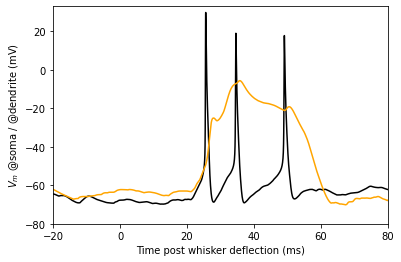

In [13]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')
I.plt.show()

In [14]:
I.sca.simple_spike_detection(t, v_soma)

[470.499999999709, 479.49999999970083, 493.99999999968765]

In [34]:
def remove_CELLTYPE_in_interval(sa, CELLTYPE=None, tmin=None, tmax=None):
    sa = sa.copy()
    celltype = sa.synapse_type.str.split('_').str[0]

    # Identify rows we want to modify
    mask = celltype == CELLTYPE

    # Only cast numeric (int/float) columns to float to safely assign NaN
    numeric_cols = sa.select_dtypes(include=["int", "float"]).columns
    sa.loc[mask, numeric_cols] = sa.loc[mask, numeric_cols].astype(float)

    # Define masking function
    def fun(x):
        return I.pd.Series({
            name: I.np.nan if (
                I.utils.convertible_to_int(name) and (tmin <= value <= tmax)
            ) else value
            for name, value in x.items()
        }).dropna()

    sa.loc[mask] = sa.loc[mask].apply(fun, axis=1)

    return sa

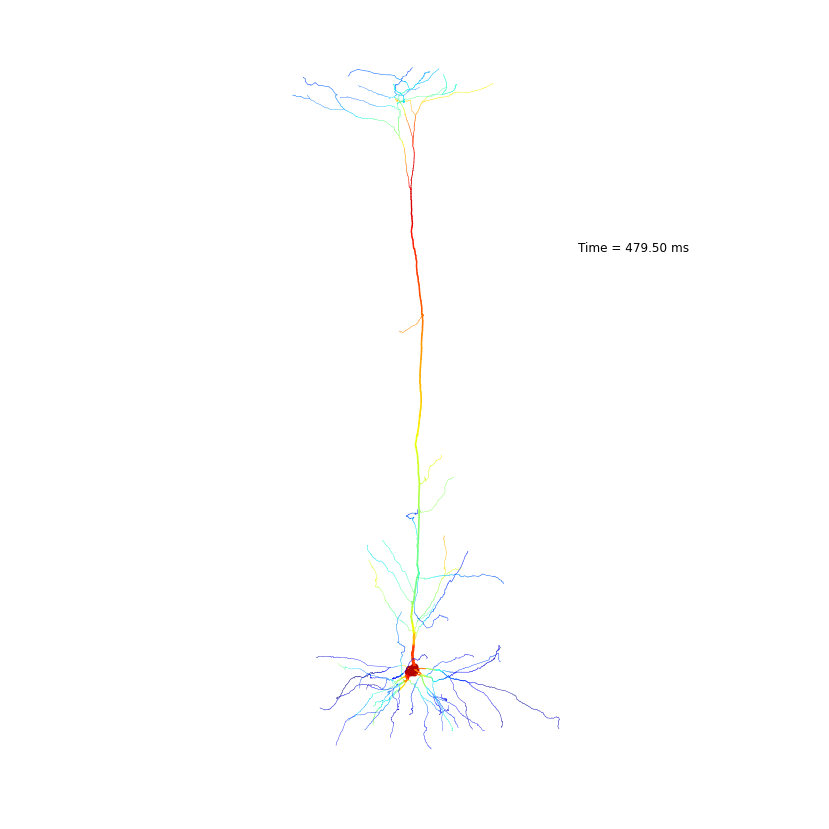

In [15]:
# visualize at timepoint of second somatic AP
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer
cmv = CellMorphologyVisualizer(cell, t_step = 0.5)
cmv.camera_position = {'azim': 270, 'dist': 10, 'elev': -5, 'roll': 0}
cmv.plot(color = 'vm', time_point = 479.5)
I.plt.show()

### Manipulations

In [18]:
def remove_CELLTYPE_in_interval(sa, CELLTYPE = None, tmin = None, tmax = None):
    sa = sa.copy()
    celltype = sa.synapse_type.str.split('_').str[0]
    fun = lambda x: I.pd.Series({name: I.np.nan if (I.utils.convertible_to_int(name) and (tmin <= value <= tmax)) else value for name, value in x.items()}).dropna()
    sa[celltype == CELLTYPE] = sa[celltype == CELLTYPE].apply(fun, axis = 1)
    return sa

### no IC evoked activity

In [19]:
def remove_intracortical_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L2', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L34', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4py', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4sp', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4ss', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5st', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5tt', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ccinv', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ct', tmin = 445+19, tmax = 445+900)
    return sa

In [20]:
# remove sensory-evoked IC input, leaving only direct TC
synapse_activation_wo_IC = remove_intracortical_in_interval(synapse_activation)

[WARNING] <ipython-input-18-b8d81b14b8e0>: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [21]:
# resimulate w/o sensory-evoked IC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_IC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [22]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

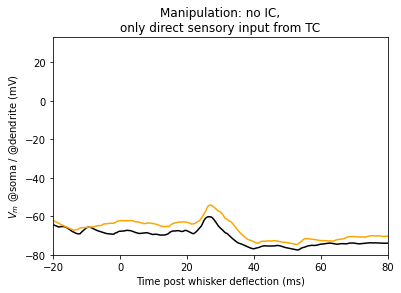

In [23]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: no IC,\nonly direct sensory input from TC')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### no TC evoked activity

In [24]:
def remove_TC_in_interval(sa):
    return remove_CELLTYPE_in_interval(sa, 'VPM', tmin = 445+19, tmax = 445+900)

In [25]:
# remove sensory-evoked TC input
synapse_activation_wo_TC = remove_TC_in_interval(synapse_activation)

In [26]:
# resimulate w/o sensory-evoked TC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_TC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [27]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

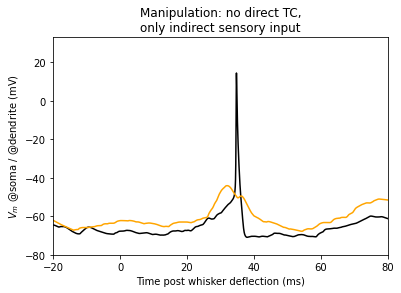

In [28]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: no direct TC,\nonly indirect sensory input')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### passive apical dendrite

In [29]:
def inactivate_channel(neuron_param, label, channel):
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] # make sure it is there
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] = 0.
        
def create_modified_neuron_param(neuron_param, manipulation = None):
    if manipulation == 'NoActiveDendrite':
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_HVA')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_LVAst')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'NaTa_t')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SK_E2')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Im')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SKv3_1')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ih')
    else:
        raise ValueError()
    return neuron_param

def remove_apical_active_conductances(neuron_param):
    return create_modified_neuron_param(neuron_param, 'NoActiveDendrite')

In [30]:
neuron_parameters_passive_apical = remove_apical_active_conductances(neuron_parameters)

In [31]:
# resimulate with passive apical dendrite
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters_passive_apical, 
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [32]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

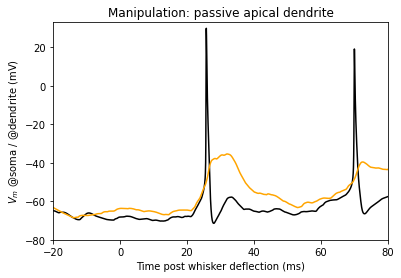

In [33]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: passive apical dendrite')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')